In [1]:
""""#Import required Image library
from PIL import Image, ImageFilter

#Open existing image
OriImage = Image.open('C:\\Users\\etien\\Downloads\\fleche-20220225T171756Z-001\\fleche\\bas\\IMG_20211210_152417.jpg')
OriImage.show()

blurImage = OriImage.filter(ImageFilter.BoxBlur(40))
blurImage.show()
#Save blurImage
blurImage.save('C:\\Users\\etien\\Downloads\\fleche-20220225T171756Z-001\\flou\\flou1.jpg')"""


'"#Import required Image library\nfrom PIL import Image, ImageFilter\n\n#Open existing image\nOriImage = Image.open(\'C:\\Users\\etien\\Downloads\\fleche-20220225T171756Z-001\\fleche\\bas\\IMG_20211210_152417.jpg\')\nOriImage.show()\n\nblurImage = OriImage.filter(ImageFilter.BoxBlur(40))\nblurImage.show()\n#Save blurImage\nblurImage.save(\'C:\\Users\\etien\\Downloads\\fleche-20220225T171756Z-001\\flou\\flou1.jpg\')'

IMAGE ORIGINALE de classe 'BAS'


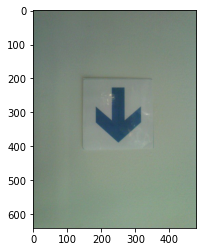

IMAGE RETOURNéE DE 13 DEGRé


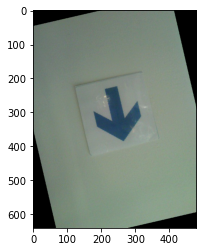

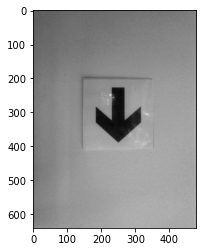

In [4]:
import matplotlib.pyplot as plt
#import Image from PIL
from PIL import Image
#read the image
import os
import numpy as np
#Import required Image library
from PIL import Image, ImageFilter


input_image = Image.open('C:\\Users\\etien\\Documents\\coolgames\\cnn\\bas\\WIN_20220225_13_36_03_Pro.jpg')
print("IMAGE ORIGINALE de classe \'BAS\'")
plt.imshow(input_image, cmap='gray')  # graph it
plt.show()
#show image 
#input_image.show()
 
#rotate image
angle = 13
output = input_image.rotate(angle)
output.show()
print("IMAGE RETOURNéE DE",angle,"DEGRé")
plt.imshow(output, cmap='gray')  # graph it
plt.show()

directory = 'C:\\Users\\etien\\Documents\\coolgames\\cnn\\bas'
i=0
""""
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        #print(np.shape(OriImage))
        blurImage = OriImage.rotate(angle)
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\cnn\\haut\\haut'+str(i)+'.jpg')
        i+=1
"""""
from skimage import color
from skimage import io
 
img = io.imread('C:\\Users\\etien\\Documents\\coolgames\\cnn\\bas\\WIN_20220225_13_36_03_Pro.jpg')
gray_img = color.rgb2gray(img)
plt.imshow(gray_img, cmap='gray')
plt.show()

In [5]:
import os
import numpy as np
#Import required Image library
from PIL import Image, ImageFilter


directory = 'C:\\Users\\etien\\Documents\\coolgames\\cnn\\haut'
i=0
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        #print(np.shape(OriImage))
        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=5))
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\cnn\\haut\\flou'+str(i)+'.jpg')
        i+=1


In [ ]:
!pip3 install tensorflow 
import tensorflow as tf

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

(3472, 3472)


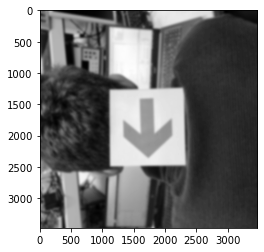

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR= 'C:\\Users\\etien\\Downloads\\fleche-20220225T171756Z-001\\cnn'
CATEGORIES= ["bas", "droite", "gauche", "haut"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        print(img_array.shape)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
training_data = []

IMG_WIDTH = 640
IMG_HEIGHT = 480

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))  # resize to normalize data size
                #training_data.append([new_array, class_num])  # add this to our training_data
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

In [ ]:
import random

random.shuffle(training_data)
for sample in training_data[:20]:
  print(sample[1])

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

for img in X:
  print(img.shape)

X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
print(X[0].shape)
#X = np.array(X) #.reshape(-1, 640, 480, 1)

#X=np.array(X)
#X = X.reshape(-1,X[0].shape[0],X[0].shape[1],1)
#y doit ^etre en one hot
print(len(y))

a=np.array(y)
y = np.zeros((a.size, a.max()+1))
y[np.arange(a.size),a] = 1
print(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
#from tensorflow.keras.datasets import mnist
#from google.colab import projet
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [ ]:
print(type(X), ": ", X.shape)

In [ ]:
X = X/255.0


In [1]:
model = Sequential()


model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu',input_shape=X.shape[1:])) #[1:]
model.add(MaxPool2D(pool_size=(4, 4), strides=None))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None))
model.add(Flatten())
#model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=4, activation='softmax'))#units=4 =nb de classes relation obligatoire pour la couche de sortie
model.summary()

#
y = np.array(y)
X = np.array(X)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
######model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
######model.fit(X, y, batch_size=32, epochs=1, validation_split=0.3)
#Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 480, 640)

NameError: name 'Sequential' is not defined